In [3]:
# imports
import networkx as nx
import matplotlib.pyplot as plt
import community
import itertools
import numpy as np

%matplotlib inline

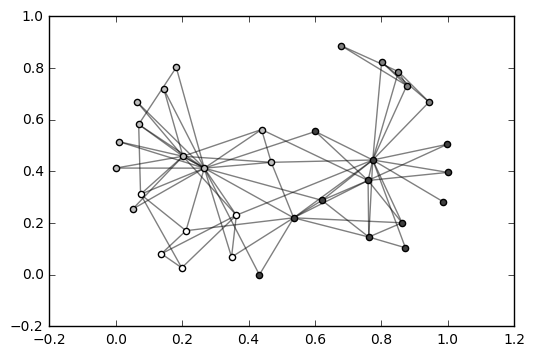

In [2]:
G = nx.karate_club_graph()

# using Community module
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [3]:
def girvan_newman (G):
    if len(G.nodes()) == 1:
        return [G.nodes()]

    def find_highest_bw_edge(G0):
        eb = nx.edge_betweenness_centrality(G0)
        eb_il = eb.items()
        eb_il.sort(key=lambda x: x[1], reverse=True)
        return eb_il[0][0]

    components = list(nx.connected_component_subgraphs(G))
    
    while len(components) == 1:
        G.remove_edge(*find_highest_bw_edge(G))
        components = list(nx.connected_component_subgraphs(G))

    result = [c.nodes() for c in components]

    for c in components:
        result.extend(girvan_newman(c))

    return result

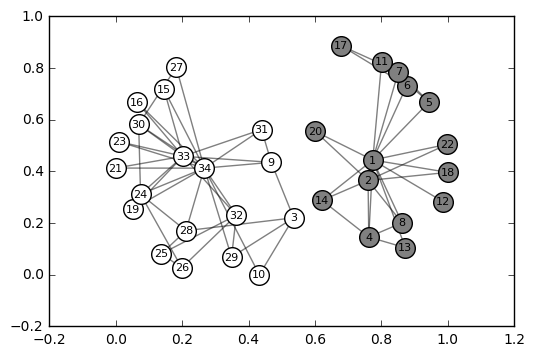

In [28]:
components = girvan_newman(G)
communities = components[:2]

# drawing
size = float(len(communities))
count = 0.
for com in communities:
    count = count + 1.
    list_nodes = [nodes for nodes in com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 200,
                            node_color = str(count / size))

edge_labels = nx.edge_betweenness_centrality(G)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=8)
plt.show()

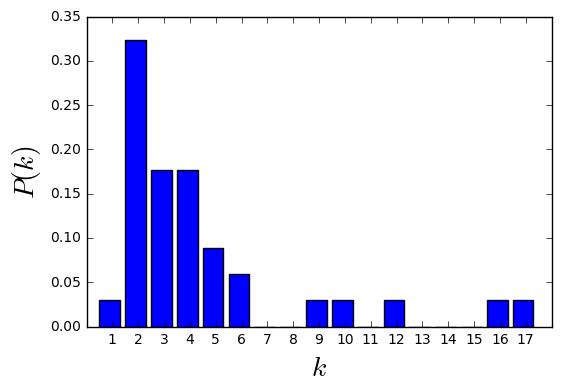

In [5]:
# graph values
G=nx.karate_club_graph()
degree_values=np.array(nx.degree(G).values())
N=nx.number_of_nodes(G)

# histogram
bins=np.arange(0.5,18.5)
deg_k=np.histogram(degree_values,bins=bins)

# degree distribution
P_k=deg_k[0]/np.float(N)

# plot
plt.bar(bins[:-1],P_k)
plt.xticks(np.arange(1,18))
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$P(k)$',fontsize=20)